# Sumaríssims en femení

Anàlisi de dades per a [Innovation and Human Rights](https://ihr.world/ca/projecte-sumarissims).

La preparació de les dades es pot veure [en aquest notebook](https://github.com/martinvirtel/sumarissims-dades/blob/master/work/preparaci%C3%B3%20de%20dades.ipynb).

La base de dades de la llista de reparació jurídica de víctimes del franquisme inclou dades des de 1937.



In [2]:
import pandas as pd
import altair as alt


dades = pd.read_msgpack("data/processat.msg")

dades.query("genere != '--'")[:5]

,codi,cognoms_nom,cognoms,nom,genere,edat,mun_naix,ped_naix,com_naix,prov_naix,...,pena,indult,afusellades,ref_arxiu,descr,correccio,pena_cat,cat_naix,cat_res,af_cat
17,135218,"ABAD ALFONSO, Erundina",ABAD ALFONSO,Erundina,Dona,43.0,Alcoi,--,Alcoià,Alacant,...,Sobreseïment,NaN,NaN,37729.0,ANC 2017 07 12,NaN,07 sob,e,b,no exec
18,25335,"ABAD ARBÓS, Ricardo",ABAD ARBÓS,Ricardo,Home,30.0,Barcelona,--,Barcelonès,Barcelona,...,Sense declaració de responsabilitats,NaN,NaN,12842.0,ANC 2017 07 12,NaN,08 lib,b,b,no exec
19,123192,"ABAD BARAS, José",ABAD BARAS,José,Home,30.0,Benavarri,--,Ribagorça,Osca,...,Absolt,NaN,NaN,49476.0,ANC 2017 07 12,NaN,08 lib,e,c,no exec
20,171,"ABAD BATLLONE, Juan",ABAD BATLLONE,Juan,Home,42.0,Barcelona,--,Barcelonès,Barcelona,...,Sense declaració de responsabilitats,NaN,NaN,4063.0,ANC 2017 07 12,NaN,08 lib,b,b,no exec
21,24485,"ABAD BOIRA, Ricardo",ABAD BOIRA,Ricardo,Home,48.0,Tauste,--,--,Saragossa,...,Sense declaració de responsabilitats,NaN,NaN,12915.0,ANC 2017 07 12,NaN,08 lib,e,b,no exec


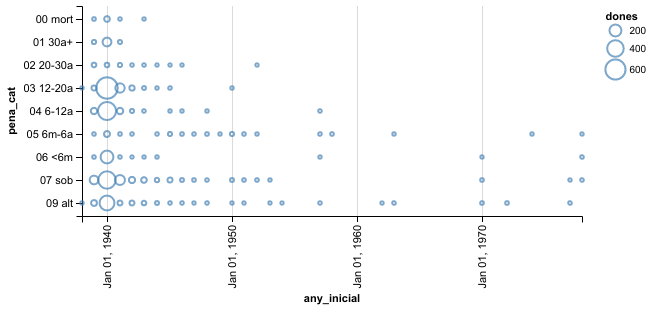

In [3]:
penes = dades.query("genere == 'Dona' and pena_cat != '08 lib'").groupby(["pena_cat","any_inicial"])["nom"].\
        count().reset_index().\
        rename(columns={"nom": "dones"})
        
alt.Chart(penes).mark_point().encode(y="pena_cat",x="any_inicial",size="dones")


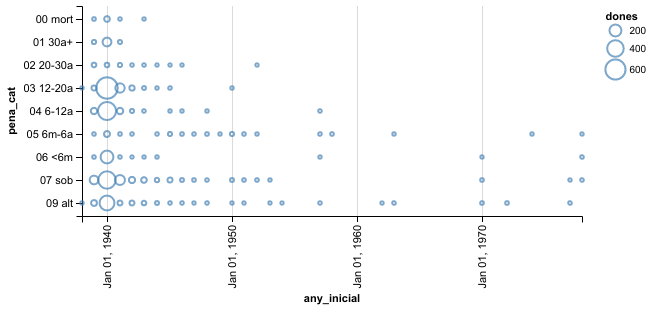